### CSCI 2000U Fall 2021- Scientific Data Analysis  - Final Project 
----

### ✩ Team 8 ✩
##### Chioma Okechukwu &nbsp;&nbsp; | 100741742
##### Krishna Patel &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | 100788320
##### William Dolan &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   | 100587997
----
##### Contributions:  

**Chioma**  
* Organized assignment of tasks among teammates
* Detailed the "Introduction", "Getting to Know Our Data" and "Analysis of the dataset" (including the pre-preprocessing step), "Potential for Data Science" sections
* Plotted and wrote up observations for research question 1, wrote observations for research question 2
* Formatted, reviewed and fixed errors on notebook and `README.md` file on GitHub

**Krishna**
* Plotted graphs for research question 3 
* Added some discussions of research question 3
* Plotted and wrote up observations for research questions 4 and 5 
* Wrote out the "Conclusion" section
* Wrote up "Acknowledgements" and "README" section on `README.md` file on GitHub

**William**
* Plotted heatmap for research question 1 
* Wrote descriptions for subplots of research question 3
* Cleaned up spelling errors and titles of graphs
* Wrote up "Introduction", "Discussion", and "Conclusion" `README.md` blogpost


## Introduction
Across our team, we felt the need to perform relevant data analysis for our project, something meaningful yet exciting. Indeed we found many interesting datasets during our search, and the one below was not our first choice. We initially proposed a dataset on Avocado prices, however, we reconsidered this and decided to search for a more robust dataset. 
Finally, we spotted a dataset promising enough for compelling analysis and meaningful enough to show us some real-world application of the concepts we learned in the course.  

### **Heart Disease Dataset**

➡️ *Source: https://archive.ics.uci.edu/ml//datasets/Heart+Disease*

Our chosen dataset for this project is the Heart Disease dataset originally donated to the UCI (University of Carlifornia, Irvine) Machine Learning Repository in 1988. It was created by 4 medical doctors and contains data from patients across Cleveland, Hungary, Switzerland, and the VA Long Beach. Records of these patients are found in separate datasets mentioned in the link above, while the Heart Disease dataset is a combination of these observations.  
According to the World Health Organization, [the number one cause of death is heart disease](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death), responsible for 16% of the world's total deaths. By 2019, there was an increase in death by heart disease from 2 million deaths in 2000 to 8.9 million recorded that year.  
With this dataset, we believe a machine learning model can help detect heart disease early by analyzing risk factors including diabetes, hypertension, obesity, physical inactivity and underlying health issues.

##### Questions we will explore
1. Does high cholesterol level always mean that an individual has heart disease?
2. Is heart disease more prevailent in male or female patients?
3. What other factors can indicate whether a person has, or is at risk for heart disease?
4. For what age and sex are each type of chest pain most common? 
5. How do different types of chest pain relate to high cholesterol and heart disease among patients?




## Getting to Know Our Data

#### Description of each attribute

| Attribute | Description | Type | Values |
|:-----------|:--------------|:-------|:-----|
| `Age`  | age of the patient in years | Numerical| | 
| `Sex` | gender of the patient  | Categorical  | <ul><li> M - male </li> <li> F - female </li></ul>|
| `ChestPainType` &nbsp;&nbsp;| chest pain type | Categorical &nbsp;| <ul><li> TA - Typical Angina (chest pain caused by physical or emotional stress) </li> <li> ATA - Atypical Angina (does not have classical symptoms of chest pain) </li> <li> NAP - Non-Anginal Pain (chest pain not caused by a heart attack) </li><li> ASY - Asymptomatic (no symptoms observed) </li></ul>|
| `RestingBP`| resting blood pressure in mmHg | Numerical | |
| `Cholesterol` | serum cholesterol in mm/dl | Numerical | |
| `FastingBS` | fasting blood sugar | Categorical | <ul><li> 1 - if `FastingBS` > 120 mg/dl </li> <li> 0 - otherwise </li></ul>|
| `RestingECG` | resting electrocardiogram results | Categorical | <ul><li>Normal - nomral ECG reading </li><li> ST - ECG has [ST wave abnormality](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) </li><li> LVH - showing probable or definite [left ventricular hypertrophy](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) by Estes' criteria  </li></ul>|
| `MaxHR`  | maximum heart rate achieved | Numerical | <ul><li>between 60 and 202 </li></ul>|
| `ExerciseAngina` | excercise-induced angina | Categorical | <ul><li> Y - yes </li><li> N - no </li></ul> |
| `Oldpeak`  | [ST depression of ECG](https://en.wikipedia.org/wiki/ST_depression) | Numerical |  |
| `ST_Slope` | the [slope of the peak exercise ST segment](https://www.sciencedirect.com/science/article/abs/pii/0002870386902656) | Categorical | <ul><li> Up - upward slope </li><li> Flat - slope is zero </li><li> Down - downward slope </li></ul> |
| `HeartDisease` | output class | Categorical | <ul><li> 1 - individual has heart disease </li><li> 2 - individual does not have heart disease </li></ul> |

In [ ]:
# importing used libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### ⬇️⬇️ uncomment this code to install the plotly library - it may take a minute or two :) ######
# !pip install plotly==5.4.0

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# loading our csv dataset into a pandas dataframe
df = pd.read_csv('heart.csv')

First we'll take a look at the dimensions of our dataset 

In [ ]:
print(df.shape, ">> we have 918 records, and 12 attributes")

(918, 12) >> we have 918 records, and 12 attributes


Then check the datatypes of each attribute

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Now let's see what the first few rows of our data look like:

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Analysis of the dataset
#### We'll inspect the quality of the data and decide what pre-processing is necessary

First, let's check if we have any **missing** values

In [ ]:
print(df.isnull().sum())
print(">> there are no empty/missing/null records")

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
>> there are no empty/missing/null records


Then check if we have any **duplicate** values

In [ ]:
print(df.duplicated().sum(), ">> there are no duplicate records found")

0 >> there are no duplicate records found


Next, let us plot statistics of each numeric attribute and look out for **outliers** and any **anomalies**

In [ ]:
# first distinguish numerical and categorical data

# columns with numerical data
num_columns =['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# columns with categorical data
cat_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

So for each **numerical data** attribute, we plot a histogram and box plot to show us what the distribution of values for that attribute looks like, and see if any data points look **anomalous** 

We'll use the `plotly.histogram` to plot an interactive chart of each attribute against a count of its values.  
&nbsp;  
`*Cool tip*: You can hover over each chart to view more information about a particular datapoint!`

In [ ]:
for col in num_columns:
    fig = px.histogram(df, x=col, color="HeartDisease", marginal="box", width=600, height=400, title = "Exploring " + col + " column")
    fig.update_traces(marker_line_width = 1, marker_line_color="black")
    fig.show()

*What do we notice from the charts above?*

1.&nbsp;First, there is a suspicious number of records where `Cholesterol = 0`, which is [not biologically possible](https://www.webmd.com/cholesterol-management/cholesterol-too-low) (note that the higher values of `Cholesterol` such as `564` and `603` are in fact possible)  
2. There is also a datapoint where `RestingBP = 0` - that seems odd.

These two observations look like **outliers**. Let us explore them further in the **pre-processing** step.

### Pre-processing 

#### Pre-processing Numerical Data

##### RestingBP Outliers
Within our team, we first discussed possible reasons why this `RestingBP` data is `0`, concluding that is is most likely a missing data point. 

In [ ]:
# confirm how many datapoints have a RestingBP = 0
print((df["RestingBP"] == 0).sum(), ">> row with RestingBP = 0")

# show this row
df[df["RestingBP"] == 0]

1 >> row with RestingBP = 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


##### How we dealt with the RestingBP outlier
Considering it is just one outlier in this case, we have decided to drop this anomalous row from the dataset.

In [ ]:
df = df[df["RestingBP"] > 0]
print(df.shape, ">> we now have 917 records; we have successfully dropped the anomaly")

(917, 12) >> we now have 917 records; we have successfully dropped the anomaly


##### Cholesterol Outliers

Again we discussed the possible reasons why some records have `Cholesterol = 0`. In the dataset `.csv` file, the `Cholesterol = 0` rows are all roughly between the indexes `293` and `539`. Since a human can not have a cholesterol level of zero, there must be an issue when obtaining the information. We noted that since all the zero cholestrol levels were grouped together, it's likely that they were caused by a technical issue that prevented the tests from being done for some time rather than human error. 

To help us decide what to do with these outliers, we will:  
1.&nbsp;Gather more information on the number of outliers  
2. Re-plot our data but this time excluding the anomalous data points  
3. Check for any *strong* differences between the rows including the outliers and the rows excluding them.  
4. Check particularly for any differences in the `HeartDisease` column when including the outliers vs. excluding them 

In [ ]:
# confirm how many rows have the outliers
print((df["Cholesterol"] == 0).sum(), ">> rows with Cholesterol = 0")

# show these rows
df_chol_is_zero = df[df["Cholesterol"] == 0]
df_chol_is_zero

171 >> rows with Cholesterol = 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
df_chol_is_not_zero = df[df["Cholesterol"] != 0]
print(df_chol_is_not_zero.shape) # confirm the dataframe shape without outliers

# plot numeric categories without outliers
for col in num_columns:
    fig = px.histogram(df_chol_is_not_zero, x=col, color="HeartDisease", marginal="box", width=600, height=400, title = "Exploring " + col + " column (without Cholesterol outliers)")
    fig.update_traces(marker_line_width = 1, marker_line_color="black")
    fig.show()

(746, 12)


Comparing this set of plots (without the outliers) to the ones with the outliers we noticed a few things:  
1.&nbsp;All plots have lower count values - this is reasonable, considering there are less records after removing outliers  
2. The `RestingBP` and `Oldpeak` plots are missing a handful of smaller values - recall we dropped the `RestingBP` outlier.  
3. The overall distribution is the same for every plot. That is, they are **not** more skewed to the left or to the right after removing the outliers.

Thus far, we believe it will be reasonable to get rid of these outliers. However, let's see what our target attribute `HeartDisease` looks like excluding outliers, before we make our final decision.

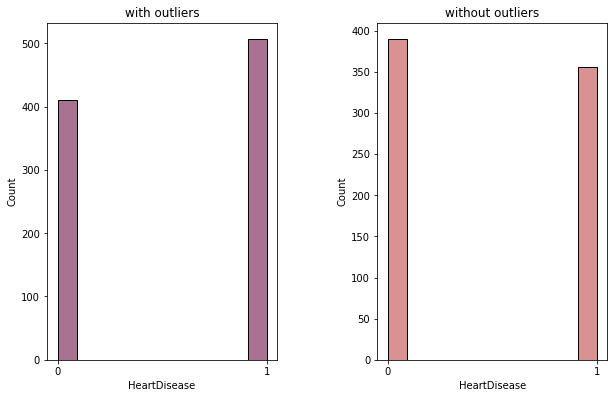

In [ ]:
# then let's check the balance of HeartDisease with these outliers and without them

fig, axes = plt.subplots(1, 2, figsize=(10, 7))

sns.histplot(df["HeartDisease"], ax=axes[0], color="#8d426e").set(title="with outliers");

sns.histplot(df_chol_is_not_zero["HeartDisease"], ax=axes[1], color="#ce6d6c").set(title="without outliers");

plt.setp(axes, xticks=[0, 1])

fig.tight_layout(pad = 6)

Taking a close look at the chart above, we notice that the `HeartDisease` column is **more balanced without the outliers**. A large portion of the rows where `Cholesterol = 0` also had `HeartDisease = 1` as such the total count for `HeartDisease = 1` is reduced after removing the outliers.  

##### How we dealt with the HeartDisease outliers
As a team, we decided that since we observed the data to be more balanced, and the distribution of other numeric attributes to generally be same after removing the outliers, we will drop these rows from the dataset before continuing on with EDA and further data science.

In [ ]:
df = df[df["Cholesterol"] > 0]
print(df.shape, ">> we now have 746 records; we have successfully dropped the anomalies")

(746, 12) >> we now have 746 records; we have successfully dropped the anomalies


----  

#### Pre-processing Categorical Data

First, we noticed our `HeartDisease` and `FastingBS` columns contain `1`s and `0`s only. These are examples of categorical data with two classes each: 
* `1` - has heart disease 
* `0` - does not have heart disease 
&nbsp;
* `1` - if `FastingBS` > 120 mg/dl
*  `0` - if `FastingBS` <= 120 mg/dl

To simplify our plots and make them readable, we will add class label columns `HeartDiseaseLabel` and `FastingBSLabel` to our dataset to correspond to the class values `1` and `0`.

In [ ]:
df["HeartDiseaseLabel"] = 'No Heart Disease'
df.loc[df['HeartDisease'] == 1, 'HeartDiseaseLabel'] = 'Has Heart Disease'

df["FastingBSLabel"] = '<= 120 mg/dl'
df.loc[df['FastingBS'] == 1, 'FastingBSLabel'] = '> 120 mg/dl'
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDiseaseLabel,FastingBSLabel
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,No Heart Disease,<= 120 mg/dl
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Has Heart Disease,<= 120 mg/dl
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,No Heart Disease,<= 120 mg/dl
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Has Heart Disease,<= 120 mg/dl
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,No Heart Disease,<= 120 mg/dl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,Has Heart Disease,<= 120 mg/dl
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,Has Heart Disease,> 120 mg/dl
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,Has Heart Disease,<= 120 mg/dl
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,Has Heart Disease,<= 120 mg/dl


## Tackling our research questions with Exploratory Data Analysis

Now that we have cleaned, balanced, and pre-processed our data, we can start searching for answers to our research questions.

#### 1. Does high cholesterol level always mean that an individual has heart disease?
To answer this question, we will look at the current relationship between `Cholesterol` and `HeartDisease` in our dataset.

Initially, we intended to use `seaborn.heatmap` to visualize this, but this gave us inconclusive results as it did not display the data in a readable manner.

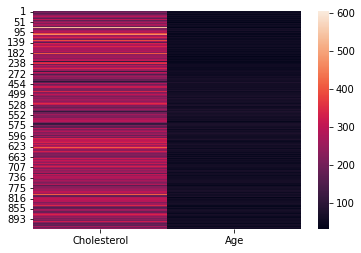

In [ ]:
disease = df[df['HeartDisease'] == 1]
noDisease = df[df['HeartDisease'] == 0]

sns.heatmap(data=disease[["Cholesterol", "Age"]]);
# df_hm = df.pivot("Cholesterol", "Age")
#sns.heatmap(df_hm)

Instead we used [`seaborn.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) which allows for a more versatile data visualization based on the parameters passed.  
The following is a bivariate plot in which we assigned `x` to `Age` and `y` to  `Cholesterol`, passing `HeartDiseaseLabel` as the `hue` to distinguish which class the record falls under. 

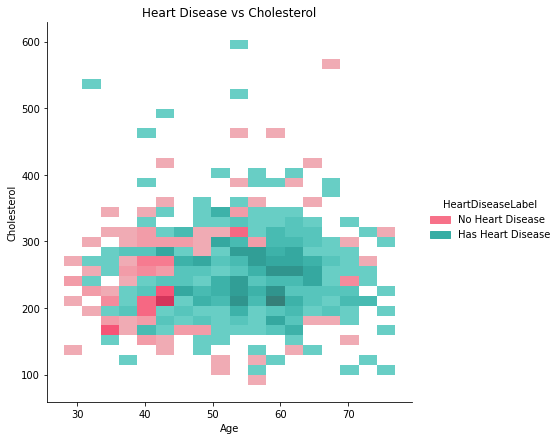

In [ ]:
ax0=sns.displot(data = df, x = "Age", y = "Cholesterol", hue="HeartDiseaseLabel", palette="husl", height=6);
plt.title("Heart Disease vs Cholesterol");

From the above plot, there does not seem to be a clear pattern of correletion between high cholesterol and heart disease. Notably, we see that out of the records of `Cholesterol > 500`, only one of the patients did not have heart disease while the others did. Other than this, the patients who have heart disease all have varying levels of cholesterol with no apparent pattern. 

Since the plot includes the patients' age, our team had follow-up questions!

#### Follow-up questions: 
##### How do the patients' cholesterol levels change with age? 
To our surprise, the data show that cholesterol levels are roughly the same across the age ranges. However, the few extremely high values of cholesterol levels occur for patients older than 40.

##### Are older patients more likely to have heart disease?

Well, we notice that heart disease was generally more prevalent in older patients, with a large number of them ranging from 50 to 70 years old - represented on the plot by the deep blue shade in this area.

In [ ]:
# create a function to plot the different attributes against HeartDisease
def plot_factor(factor_name, xticks = None, title = None):
    plt.figure(figsize=(13,7)) 

    ax = sns.countplot(x = df[factor_name], data=df, hue = df["HeartDiseaseLabel"], palette="flare");
    sns.set(font_scale = 1.5)

    if title:
        ax.set_title(title);
    else:
        ax.set_title("Heart Disease vs " + factor_name);


    if xticks:
        ax.set_xticklabels(xticks);
    ax.set(ylabel = "Count");
    plt.show();

Our research questions from `2` to all the sub questions in `3` follow the same pattern of comparing the frequency of `HeartDisease` against different attributes in our dataset. We have created a function using `seaborn.countplot` to plot each of these, and save time rewriting the same block of code.

#### 2. Is heart disease more prevalent in men or women? 

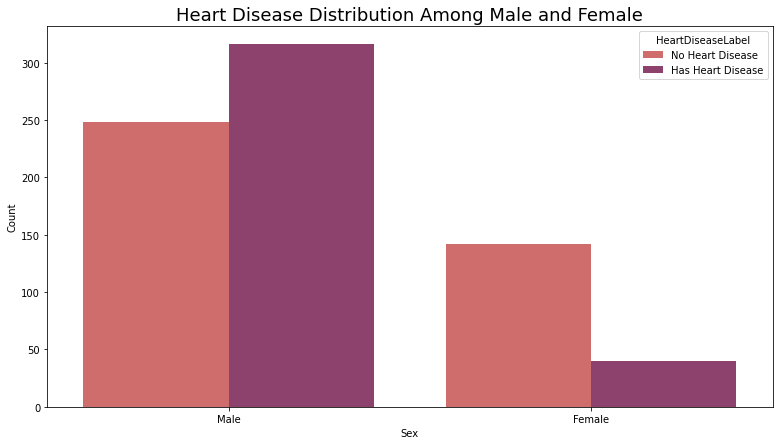

In [ ]:
plot_factor("Sex", ["Male", "Female"], "Heart Disease Distribution Among Male and Female")

From this data, we find that a larger proportion of the male patients had heart disease, than their female counterparts. This corresponds to the current real-world research, which states that [men are more likely to develop heart disease than women](https://www.sciencedirect.com/science/article/pii/S2590093519300256#:~:text=According%20to%20the%20American%20Heart,men%20and%2047.1%25%20were%20women.). 

#### 3. Correlation of other data with heart disease

##### 3.1. Heart Disease vs RestingECG

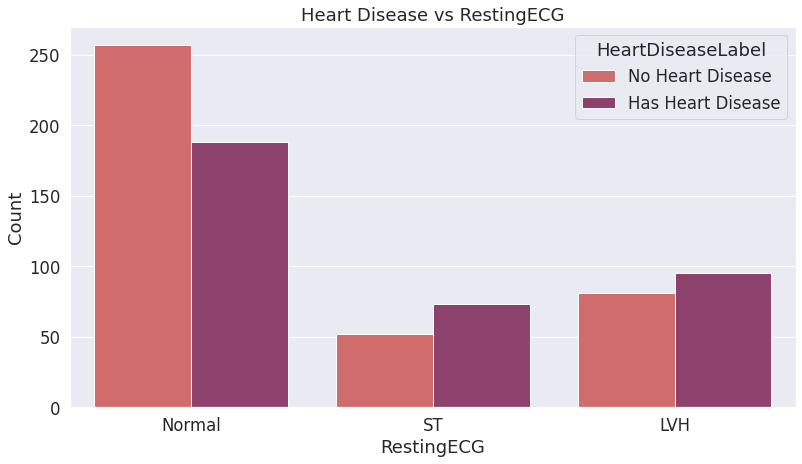

In [ ]:
plot_factor("RestingECG", ["Normal", "ST","LVH"])

Comparatively when the patient's ECG is normal, there were less cases with heart disease, but when the patient's ECG displays left ventricular hypertrophy (LVH) or ST wave abnormalities (ST) there is a much higher likelihood that they had a heart disease.

##### 3.2. Heart Disease vs Chest Pain Type

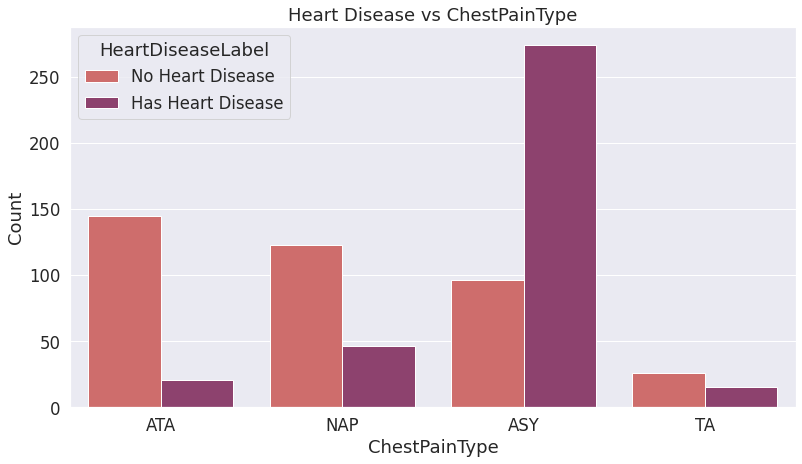

In [ ]:
plot_factor("ChestPainType")

Patients experiencing Atypical Angina usually did not have a heart disease. About a third of Patients experiencing Non-Anginal Pain and half of patients experiencing Typical Angina had heart diseases.
The vast majority of patients with heart disease, almost 4 times as many as without, displayed no symptoms of Angina. This may be because the disease itself was the cause of the patient's heart failure or because any experienced pain was considered 'normal'.

##### 3.3. Heart Disease vs Exercise Angina

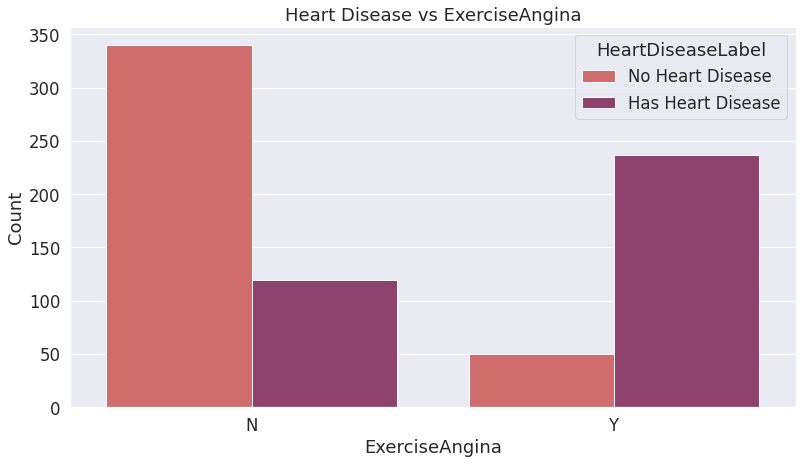

In [ ]:
plot_factor("ExerciseAngina")

The chart above shows that patients with heart diseases experienced exercise-induced angina far more than patients without heart disease. This is probably because heart disease increases the risk of angina during exercise.

##### 3.4. Heart Disease vs Fasting Blood Sugar

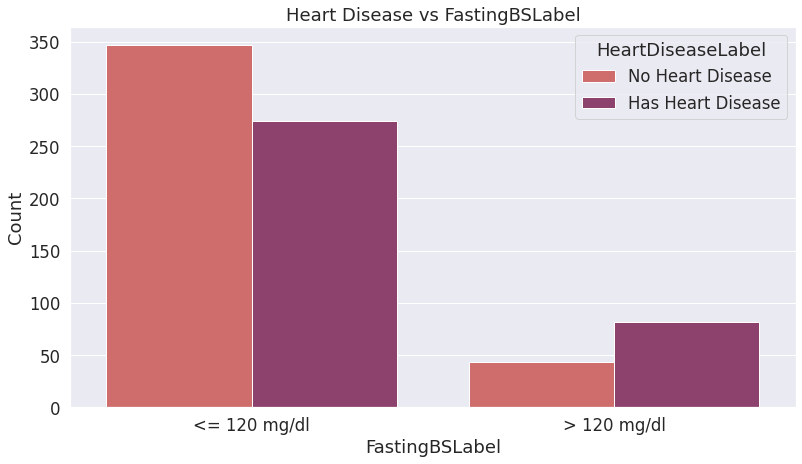

In [ ]:
plot_factor("FastingBSLabel")

In general, there were significantly more patients with normal or low fasting blood sugar (`<= 120 mg/dl`) than patients with high blood sugar. However, more patients with heart disease had high blood sugar than patients without heart disease. This makes sense considering a fasting blood sugar level [above 125 mg/dl is considered diabetic](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20fasting%20blood%20sugar%20level,Oral%20glucose%20tolerance%20test.), and diabetes is one of the risk factors of heart disease.


##### 3.5. Heart Disease vs ST Slope

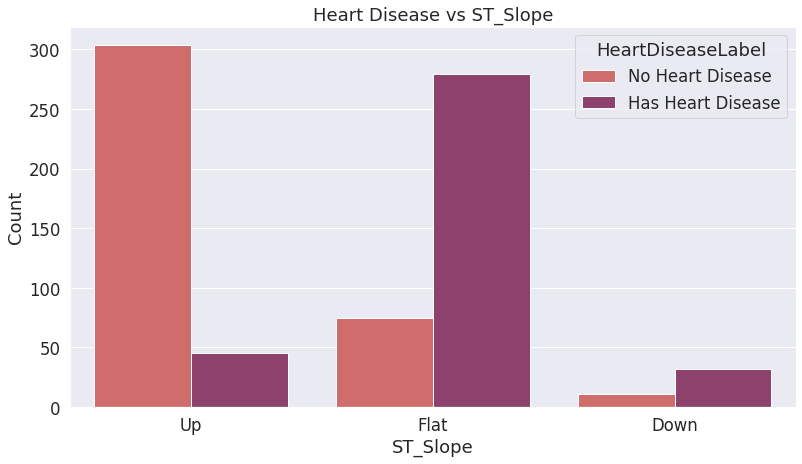

In [ ]:
plot_factor("ST_Slope")

Observing the graph above, it is seen that patients tend to have heart disease when the ST slope is flat compared to having a ST slope up or down. This is due to patients having irregularity in their heart beats. However, there are some patiatents who have flat ST slopes but do not have heart disease. This is due to other factors such as stress, anxiety or other medical issues that can lead to these iregularites. Another factor could be from drug usage, such as prescribed medicines, caffiene, etc.

#### 3.6. Heart Disease vs Maximum Heart Rate

Because the `MaxHR` column contains **many** distinct values, we will use `seaborn.histplot` instead of `countplot` to make our data visualization more concise and readable.

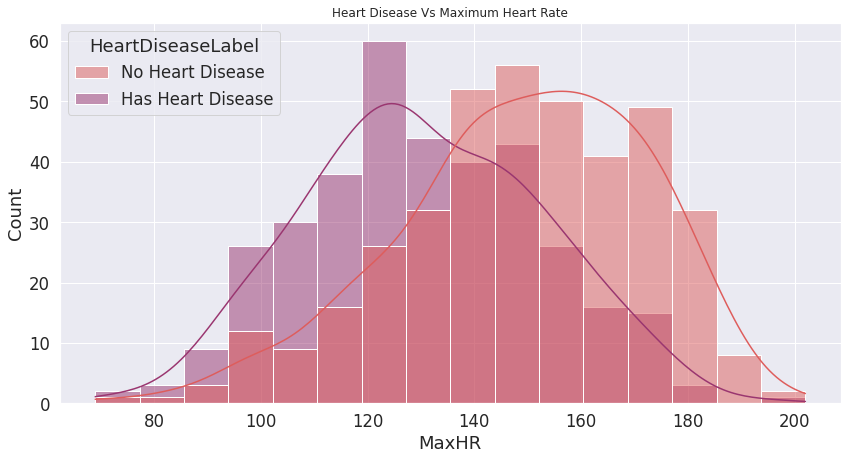

In [ ]:
plt.figure(figsize=(14, 7))
ax6=sns.histplot(data=df, x = df["MaxHR"], hue = df["HeartDiseaseLabel"], palette="flare", kde=True);

sns.set(font_scale = 1)
ax6.set_title("Heart Disease Vs Maximum Heart Rate");
ax6.set(ylabel = "Count");

While the results are surprisingly similar between patients with heart disease and without, the range of maximum heart rates of patients without heart disease is higher than the range of maximum heart rate reading of patients with heart rate.

#### 4. At what age and sex are each type of chest pain most common?

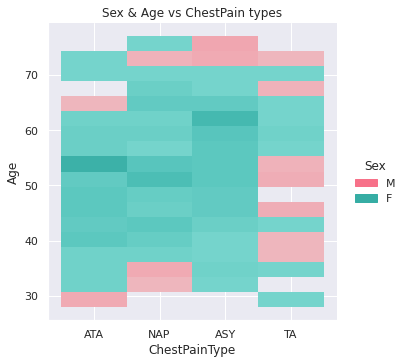

In [ ]:
ax8=sns.displot(data = df, x = "ChestPainType", y = "Age", hue="Sex", palette="husl", height=5);
plt.title("Sex & Age vs Chest Pain types");

From this plot, we see that females have more chest pain then males, which [according to real-world research](https://www.heart.org/en/health-topics/heart-attack/warning-signs-of-a-heart-attack/heart-attack-symptoms-in-women), is true. These chest pains tend to be ATypical Angina (ATA) and Non-Anginal Chest Pain (NAP). However, some females were asymptomatic (ASY). A large proportion of these females are between the ages of 32-62. When it comes to male patients they tend have chest pain between the ages 35 and below and 72 and up. Males experience Typical Angina (TA) chest pain between the ages  35-42 and 45-55.

#### 5. How do different types of chest pain relate to high cholesterol and heart disease among patients?

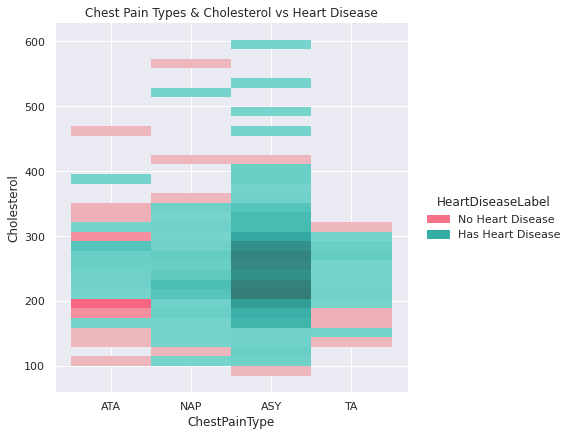

In [ ]:
ax8=sns.displot(data = df, x = "ChestPainType", y = "Cholesterol", hue="HeartDiseaseLabel", palette="husl", height=6);
plt.title("Chest Pain Types & Cholesterol vs Heart Disease");

We noticed the deep concentration of heart disease patients on the plot have a cholestrol level between 200-300, and showed no symptoms of chest pain. Then, patients who did not have heart disease and recorded ATypical Angina (ATA) chest pain and tended to have a cholesterol of 200-180 and 160-100.

## Potential for Data Science

After Exploratory Data Analysis (EDA) ususlly comes the data science tasks where we draw insights. This is outside the scope of our project, but but let us outline the potential for data science of this dataset.  
As mentioned earlier, the key usefulness of the data is to **create a model to predict the occurence of heart disease in patients based on the attributes listed** here (cholesterol, type of chest pain, age, sex, blood sugar level, etc.). This will help individuals and healthcare providers detect heart disease early, and start treatment before the patient's health deteriorates.



## Conclusion
Overall, we felt like this analysis turned out well as we managed to find the information needed to answer the research questions that our group came up with. However, we came into problems with the data set when it came to outliers. We had a lot of patients who were recorded to have `0` cholesterol level which is impossible. This may have severely changed the answers/conclusions drawn from our findings.

We learned many things from our analysis, and one of the major lessons we learned is that the graphs we decide to choose matter. When it come to heatmaps, we thought it would help us with our research, but it only made it harder to draw conclusions from them. We resorted to displot graphs which helped us out as it made it easier to read. Most of the time we spent checking over the analysis was to check if a graph helped answer our questions.

The data set did not give us a lot of limitations, however, we felt that if a column showed every patient's country, we could draw a lot more conclusions about that country's health care or patterns with patients who have heart disease and their country.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c1334f9-4d1c-4af5-beee-d3f2a665905b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>